# Informacion
Se pretende hacer un analisis de casos de infidelidades para saber que factores son los que influyen en el comportamiento de un grupo de personas, se pretende usar algun metodo para predecir que porcentaje de personas son propensas a ser infieles. Tener en claro que son aproximadamente 600 personas, por lo que la muestra no puede extrapolar mas que a un sector local de la poblacion donde se tomo la muestra.

# DataSet
El data set fue otorgado por un reclutador para evaluar la capacidad de analisis de un problema, dando una base de datos en formato CSV. Descripción de Variables:

Infidelidades Numérico. Cuántas relaciones sexuales extramaritales ha tenido el año anterior?

Genero Factor. Indica el sexo de la persona

Edad Variable Numérica codificada: 17.5 = bajo 20, 22 = 20–24, 27 = 25–29, 32 = 30–34, 37 = 35–39, 42 = 40–44, 47 = 45–49, 52 = 50–54, 57 = 55 o más.

Años casado Variable Numérica codificada: 0.125 = 3 meses o menos, 0.417 = 4–6 meses, 0.75 = 6 meses–1 año, 1.5 = 1–2 años, 4 = 3–5 años, 7 = 6–8 años, 10 = 9–11 años, 15 = 12 o más años.

Hijos del matrimonio Factor. Hay niños nacidos en el matrimonio?

Religiosidad Variable Numérica codificada: 1 = nada, 2 = poco, 3 = indiferente, 4 = algo, 5 = muy.

Educación Variable Numérica codificada: 9 =básica, 12 = media, 14 =Superior Incompleto, 16 y 17 = Superior, 18 = Magister, 20 = Doctorado o Postdoctorado.

Ocupación Númerica Ocupación en relación a la clasificación de Hollingshead.

Calidad del Matrimonio

Variable Numérica codificada: 1 = muy infeliz, 2 = infeliz, 3 = medianamente, 4 = más feliz que la media, 5 = muy feliz.

In [74]:
import pandas as pd
import numpy as np

df = pd.read_csv("inf_main.csv")

df.drop(['ID'],1, inplace=True)

df["Genero"] = df["Genero"].replace(['hombre'],0)
df["Genero"] = df["Genero"].replace(['mujer'],1)

df["Hijos del matrimonio"] = df["Hijos del matrimonio"].replace(['no'],0)
df["Hijos del matrimonio"] = df["Hijos del matrimonio"].replace(['si'],1)

df["Edad"] = pd.to_numeric(df["Edad"].str.replace(',','.'), errors='coerce')
df["Años casado"] = pd.to_numeric(df["Años casado"].str.replace(',','.'), errors='coerce')

print(pd.DataFrame((df["Infidelidades"]).groupby(df["Genero"]).mean()),"\n")
print(pd.DataFrame((df["Infidelidades"]).groupby(df["Genero"]).median()),"\n")
print(pd.DataFrame((df["Infidelidades"]).groupby(df["Genero"]).count()),"\n")

print (df.mean(),"\n")
print (df.median(),"\n")

print (df.head())


        Infidelidades
Genero               
0            1.496503
1            1.419048 

        Infidelidades
Genero               
0                   0
1                   0 

        Infidelidades
Genero               
0                 286
1                 315 

Infidelidades              1.455907
Genero                     0.524126
Edad                      32.487521
Años casado                8.177696
Hijos del matrimonio       0.715474
Religiosidad               3.116473
Educacion                 16.166389
Ocupacion                  4.194676
Calidad del Matrimonio     3.931780
dtype: float64 

Infidelidades              0.0
Genero                     1.0
Edad                      32.0
Años casado                7.0
Hijos del matrimonio       1.0
Religiosidad               3.0
Educacion                 16.0
Ocupacion                  5.0
Calidad del Matrimonio     4.0
dtype: float64 

   Infidelidades  Genero  Edad  Años casado  Hijos del matrimonio  \
0              0       0

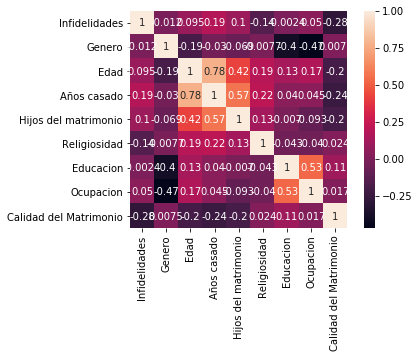

In [69]:
import seaborn as sns

sns.heatmap(df.corr(), square = True, annot = True)

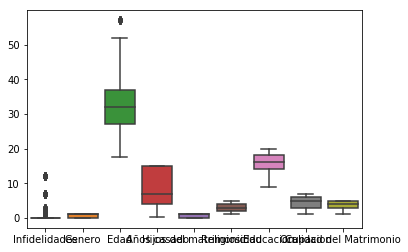

In [75]:
sns.boxplot(data = df)

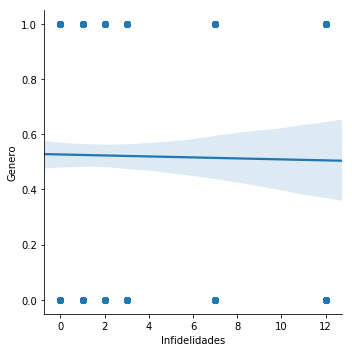

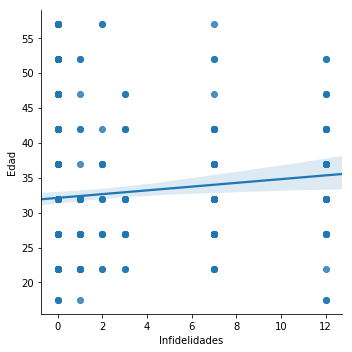

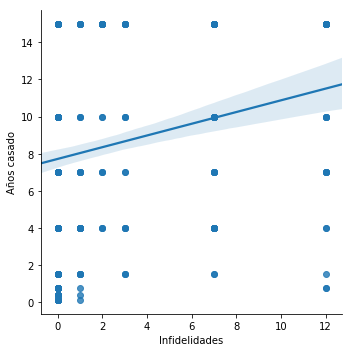

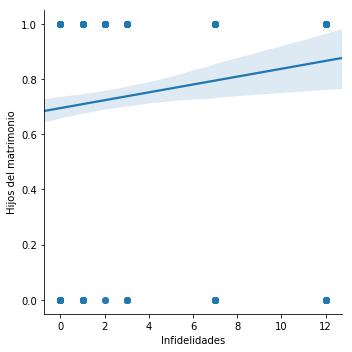

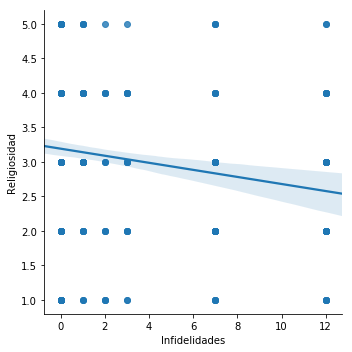

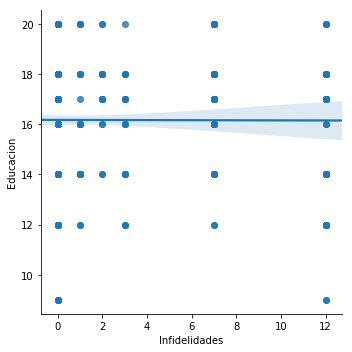

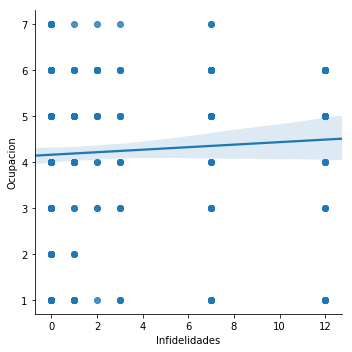

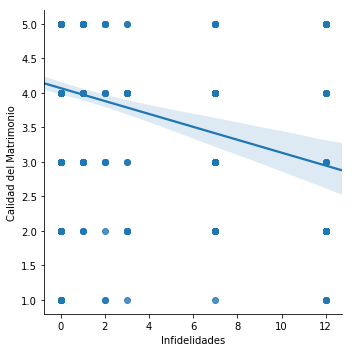

In [76]:
sns.lmplot("Infidelidades","Genero",data = df)
sns.lmplot("Infidelidades","Edad",data = df)
sns.lmplot("Infidelidades","Años casado",data = df)
sns.lmplot("Infidelidades","Hijos del matrimonio",data = df)
sns.lmplot("Infidelidades","Religiosidad",data = df)
sns.lmplot("Infidelidades","Educacion",data = df)
sns.lmplot("Infidelidades","Ocupacion",data = df)
sns.lmplot("Infidelidades","Calidad del Matrimonio",data = df)

/home/spawnqq/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


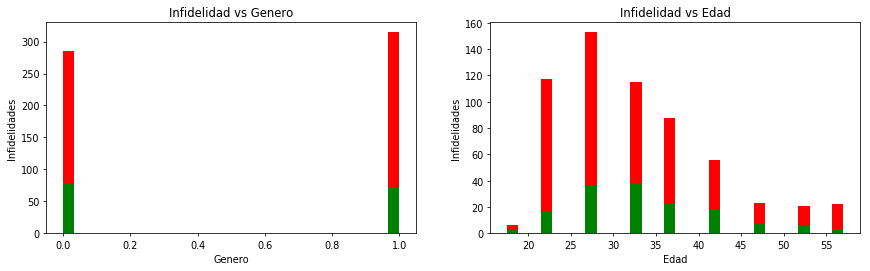

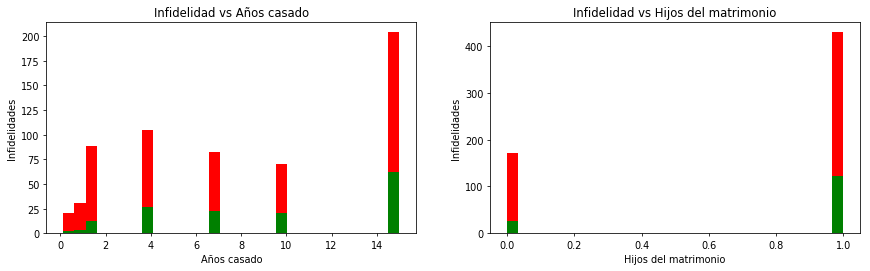

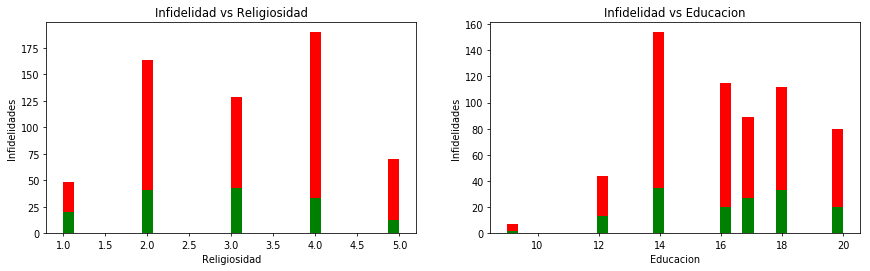

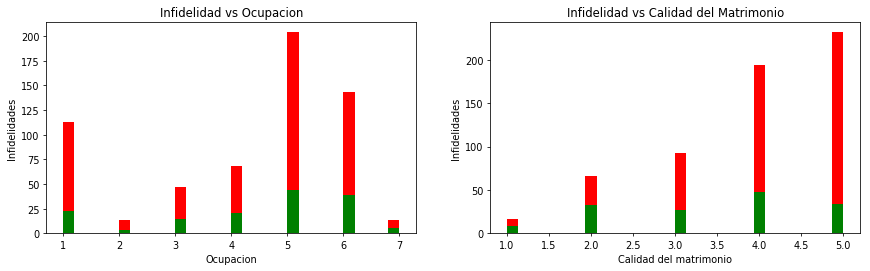

In [77]:
import matplotlib.pyplot as plt
import numpy as np

#Primer par de graficos

plt.figure(figsize=(15, 4), dpi=70)
plt.subplot(1,2,1)
plt.title("Infidelidad vs Genero")
plt.xlabel("Genero")
plt.ylabel("Infidelidades")

plt.hist([df[df['Infidelidades']>0]['Genero'],df[df['Infidelidades']==0]['Genero']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])

plt.subplot(1,2,2)
plt.title("Infidelidad vs Edad")
plt.xlabel("Edad")
plt.ylabel("Infidelidades")

plt.hist([df[df['Infidelidades']>0]['Edad'],df[df['Infidelidades']==0]['Edad']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])
plt.show()

#Segundo par de graficos

plt.figure(figsize=(15, 4), dpi=70)
plt.subplot(1,2,1)
plt.title("Infidelidad vs Años casado")
plt.xlabel("Años casado")
plt.ylabel("Infidelidades")

plt.hist([df[df['Infidelidades']>0]['Años casado'],df[df['Infidelidades']==0]['Años casado']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])

plt.subplot(1,2,2)
plt.title("Infidelidad vs Hijos del matrimonio")
plt.xlabel("Hijos del matrimonio")
plt.ylabel("Infidelidades")

plt.hist([df[df['Infidelidades']>0]['Hijos del matrimonio'],df[df['Infidelidades']==0]['Hijos del matrimonio']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])
plt.show()

#Tercer par de graficos

plt.figure(figsize=(15, 4), dpi=70)
plt.subplot(1,2,1)
plt.title("Infidelidad vs Religiosidad")
plt.xlabel("Religiosidad")
plt.ylabel("Infidelidades")

plt.hist([df[df['Infidelidades']>0]['Religiosidad'],df[df['Infidelidades']==0]['Religiosidad']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])

plt.subplot(1,2,2)
plt.title("Infidelidad vs Educacion")
plt.xlabel("Educacion")
plt.ylabel("Infidelidades")

plt.hist([df[df['Infidelidades']>0]['Educacion'],df[df['Infidelidades']==0]['Educacion']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])
plt.show()

#Cuarto par de graficos

plt.figure(figsize=(15, 4), dpi=70)
plt.subplot(1,2,1)
plt.title("Infidelidad vs Ocupacion")
plt.xlabel("Ocupacion")
plt.ylabel("Infidelidades")

plt.hist([df[df['Infidelidades']>0]['Ocupacion'],df[df['Infidelidades']==0]['Ocupacion']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])

plt.subplot(1,2,2)
plt.title("Infidelidad vs Calidad del Matrimonio")
plt.xlabel("Calidad del matrimonio")
plt.ylabel("Infidelidades")

plt.hist([df[df['Infidelidades']>0]['Calidad del Matrimonio'],df[df['Infidelidades']==0]['Calidad del Matrimonio']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Infiel','Fiel'])
plt.show()